In [1]:
import numpy as np
import pandas as pd

In [2]:
df4 = pd.read_csv('grocery.csv')

C:\Users\adity\AppData\Local\Temp\ipykernel_16472\2388322799.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('grocery.csv')


In [3]:
df4.sample(1)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
204814,15601,Bakery & Bread,Fresh Bakery Breads,"Baguettes, Loaves & Breadsticks",Bakery & Bread/Fresh Bakery Breads,46491757,https://www.walmart.com/ip/Freshness-Guarantee...,"Freshness Guaranteed Sesame French Bread, 14 oz",Freshness Guaranteed,1.78,1.78,14,NaN,2022-09-11 21:20:04,16368618


In [4]:
# Check the structure of df4
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SHIPPING_LOCATION  568534 non-null  int64  
 1   DEPARTMENT         568534 non-null  object 
 2   CATEGORY           568534 non-null  object 
 3   SUBCATEGORY        361324 non-null  object 
 4   BREADCRUMBS        568534 non-null  object 
 5   SKU                568534 non-null  int64  
 6   PRODUCT_URL        568534 non-null  object 
 7   PRODUCT_NAME       568534 non-null  object 
 8   BRAND              568507 non-null  object 
 9   PRICE_RETAIL       568534 non-null  float64
 10  PRICE_CURRENT      568534 non-null  float64
 11  PRODUCT_SIZE       505709 non-null  object 
 12  PROMOTION          0 non-null       float64
 13  RunDate            568534 non-null  object 
 14  tid                568534 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 65

In [5]:
# Check available columns
df4.columns
df4.shape

(568534, 15)

In [6]:
categories = {
'Snacks': ['Chips', 'Biscuits', 'Chocolate', 'Candy', 'Namkeen', 'Noodles', 'Popcorn', 'Cookies', 'Wafers', 'Puffs', 'Granola Bars', 'Nuts', 'Dried Fruits', 'Crackers', 'Pretzels', 'Samosas', 'Bhujia', 'Mixtures', 'Farsan', 'Extruded Snacks'],
'Beverages': ['Juice', 'Soft Drink', 'Milk', 'Water', 'Energy Drink', 'Tea', 'Coffee', 'Soda', 'Lemonade', 'Sports Drink', 'Herbal Tea', 'Iced Tea', 'Coconut Water', 'Flavored Milk', 'Plant-Based Milk', 'Syrups', 'Cordials', 'Beer', 'Wine', 'Mocktails'],
'Grocery': ['Rice', 'Atta', 'Oil', 'Dal', 'Spices', 'Masalas', 'Meat', 'Flour', 'Sugar', 'Salt', 'Lentils', 'Pulses', 'Wheat', 'Maida', 'Besan', 'Semolina', 'Poha', 'Vermicelli', 'Pasta', 'Canned Goods', 'Pickles', 'Sauces', 'Vinegar', 'Honey', 'Jaggery', 'Dry Herbs', 'Baking Powder', 'Yeast', 'Cereals', 'Oats'],
'Dairy': ['Milk', 'Cheese', 'Yogurt', 'Butter', 'Paneer', 'Cream', 'Ghee', 'Curd', 'Ice Cream', 'Condensed Milk', 'Milk Powder', 'Whipped Cream', 'Sour Cream', 'Cottage Cheese', 'Mozzarella', 'Cheddar', 'Buttermilk', 'Lassi', 'Flavored Yogurt'],
'Breakfast': ['Cereals', 'Oats', 'Bread', 'Jams', 'Honey', 'Peanut Butter', 'Cornflakes', 'Muesli', 'Porridge', 'Idli Mix', 'Dosa Mix', 'Upma Mix', 'Pancake Mix', 'Waffles', 'Granola', 'Nutella', 'Marmalade', 'Fruit Preserves', 'Breakfast Bars', 'Instant Breakfast Drinks'],
'Personal Care': ['Shampoo', 'Soap', 'Toothpaste', 'Deodorant', 'Skin Care', 'Creams', 'Lotion', 'Face Wash', 'Body Wash', 'Conditioner', 'Hair Oil', 'Talcum Powder', 'Perfume', 'Moisturizer', 'Sunscreen', 'Lip Balm', 'Hand Sanitizer', 'Shaving Cream', 'Razors', 'Feminine Hygiene', 'Baby Oil', 'Foot Cream', 'Anti-Aging Cream', 'Acne Treatment'],
'Household': ['Detergent', 'Cleaner', 'Trash Bags', 'Dishwash Liquid', 'Floor Cleaner', 'Toilet Cleaner', 'Air Freshener', 'Broom', 'Mop', 'Sponges', 'Scrubbers', 'Laundry Detergent', 'Fabric Softener', 'Bleach', 'Glass Cleaner', 'Kitchen Towels', 'Tissue Paper', 'Aluminum Foil', 'Cling Wrap', 'Baking Sheets'],
'Home and Kitchen': ['Utensils', 'Cookware', 'Cutlery', 'Plates', 'Glasses', 'Mugs', 'Blender', 'Mixer', 'Toaster', 'Microwave', 'Oven Mitts', 'Kitchen Towels', 'Storage Containers', 'Jars', 'Bottles', 'Spice Racks', 'Chopping Boards', 'Knives', 'Pans', 'Pots', 'Pressure Cooker', 'Induction Cooktop', 'Food Processor'],
'Clothing and Accessories': ['Shirts', 'Pants', 'Dresses', 'Shoes', 'Bags', 'Belts', 'Hats', 'Scarves', 'Jewelry', 'Watches', 'Sunglasses', 'Socks', 'Underwear', 'Jackets', 'Ties', 'Wallets', 'Backpacks', 'Handbags', 'Earrings', 'Necklaces', 'Bracelets', 'Rings', 'Caps', 'Gloves'],
'Baby': ['Diapers', 'Baby Food', 'Wipes', 'Baby Shampoo', 'Baby Lotion', 'Baby Powder', 'Baby Oil', 'Bottles', 'Pacifiers', 'Teethers', 'Baby Clothes', 'Baby Blankets', 'Cribs', 'Strollers', 'Car Seats', 'Baby Toys', 'Breast Pumps', 'Formula Milk', 'Baby Cereal', 'Baby Bibs'],
'Bakery': ['Bread', 'Cakes', 'Pastries', 'Cookies', 'Buns', 'Muffins', 'Donuts', 'Croissants', 'Pies', 'Tarts', 'Baguettes', 'Rolls', 'Biscuits', 'Scones', 'Brownies', 'Cupcakes', 'Sandwich Bread', 'Whole Wheat Bread', 'Gluten-Free Bread'],
'Frozen Foods': ['Ice Cream', 'Frozen Vegetables', 'Frozen Fruits', 'Frozen Meals', 'Pizza', 'French Fries', 'Nuggets', 'Parathas', 'Samosas', 'Spring Rolls', 'Frozen Yogurt', 'Ready-to-Eat Curries', 'Frozen Meat', 'Fish Sticks', 'Veggie Burgers'],
'Fruits and Vegetables': ['Apples', 'Bananas', 'Oranges', 'Carrots', 'Potatoes', 'Tomatoes', 'Onions', 'Leafy Greens', 'Berries', 'Mangoes', 'Grapes', 'Lemons', 'Cucumbers', 'Peppers', 'Broccoli', 'Cauliflower', 'Spinach', 'Garlic', 'Ginger', 'Herbs'],
'Health and Wellness': ['Vitamins', 'Supplements', 'Protein Powder', 'Energy Bars', 'Herbal Teas', 'Essential Oils', 'Pain Relievers', 'Bandages', 'Thermometers', 'Fitness Equipment', 'Yoga Mats', 'Weighing Scales', 'Blood Pressure Monitors', 'Glucose Meters'],
'Electronics': ['Mobile Phones', 'Chargers', 'Earphones', 'Batteries', 'Power Banks', 'USB Cables', 'Speakers', 'Headphones', 'Laptop Accessories', 'Memory Cards', 'Screen Protectors', 'Cases', 'Smart Watches', 'Fitness Trackers'],
'others' : ['add extra item here ']
}

In [7]:
# Function to find category based on keywords in CATEGORY and SUBCATEGORY
def find_category(row):
    """
    Search for keywords from category and subcategory in the categories dictionary
    """
    category_text = str(row['CATEGORY']).lower() if pd.notna(row['CATEGORY']) else ''
    subcategory_text = str(row['SUBCATEGORY']).lower() if pd.notna(row['SUBCATEGORY']) else ''
    
    # Combine both for keyword search
    search_text = category_text + ' ' + subcategory_text
    
    # Search through categories dictionary
    for category_name, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in search_text:
                return category_name
    
    # If no match found, return 'others'
    return 'others'

In [8]:
# Create the new DataFrame
new_df = pd.DataFrame()

# Column 1: name from PRODUCT_NAME
new_df['name'] = df4['PRODUCT_NAME']

# Column 2: type - map categories using the function
new_df['type'] = df4.apply(find_category, axis=1)

# Column 3: size from PRODUCT_SIZE (will fill NaN values next)
new_df['size'] = df4['PRODUCT_SIZE']

new_df.head(10)

,name,type,size
0,"Marketside Roasted Red Pepper Hummus, 10 Oz",others,10
1,"Marketside Roasted Garlic Hummus, 10 Oz",others,10
2,"Marketside Classic Hummus, 10 Oz",others,10
3,"Marketside Everything Hummus, 10 oz",others,10
4,"Price's Jalapeno Dip, 12 Oz.",others,12
5,"Price's Green Chili Dip, 12 Oz.",others,12
6,"Dean's, French Onion Dip, 16 oz Tub",others,16
7,"Marketside Spinach & Artichoke Dip, 16 Oz",others,16
8,Fresh Cravings Roasted Red Pepper Hummus 10oz,others,10
9,"Marketside Buffalo Style Chicken Dip, 11 oz",others,11


In [9]:
# Convert size to numeric (coerce errors to NaN)
new_df['size'] = pd.to_numeric(new_df['size'], errors='coerce')

# Calculate mean size for each category
category_mean_sizes = new_df.groupby('type')['size'].mean()

print("Mean sizes by category:")
print(category_mean_sizes)

Mean sizes by category:
type
Bakery                      15.449822
Beverages                   64.154896
Breakfast                   16.135489
Clothing and Accessories    28.130976
Dairy                       12.912360
Frozen Foods                19.140506
Fruits and Vegetables       15.420807
Grocery                     15.244382
Home and Kitchen            15.858171
Snacks                      12.142046
others                      18.827356
Name: size, dtype: float64


In [10]:
# Fill NaN values in size column with category mean
new_df['size'] = new_df.apply(
    lambda row: category_mean_sizes[row['type']] if pd.isna(row['size']) else row['size'], 
    axis=1
)

# Check for any remaining NaN values
print(f"\nRemaining NaN values in size column: {new_df['size'].isna().sum()}")


Remaining NaN values in size column: 0


In [11]:
# Remove only 150,000 rows where type is 'others'
print(f"Rows before filtering: {len(new_df)}")
others_count = len(new_df[new_df['type'] == 'others'])
print(f"Rows with 'others' type: {others_count}")

# Get indices of rows with 'others' type
others_indices = new_df[new_df['type'] == 'others'].index

# Randomly select 150,000 indices to remove
if others_count > 150000:
    indices_to_remove = np.random.choice(others_indices, size=150000, replace=False)
    new_df = new_df.drop(indices_to_remove).reset_index(drop=True)
    print(f"Removed 150,000 'others' rows")
else:
    print(f"Not enough 'others' rows to remove 150,000")

print(f"Rows after filtering: {len(new_df)}")
print(f"Remaining 'others' rows: {len(new_df[new_df['type'] == 'others'])}")

Rows before filtering: 568534
Rows with 'others' type: 206749
Removed 150,000 'others' rows
Rows after filtering: 418534
Remaining 'others' rows: 56749


In [12]:
# Display the new DataFrame
print(f"Shape of new DataFrame: {new_df.shape}")
print(f"\nData types:")
print(new_df.dtypes)
print(f"\nFirst 10 rows:")
new_df.sample(10)

Shape of new DataFrame: (418534, 3)

Data types:
name     object
type     object
size    float64
dtype: object

First 10 rows:


,name,type,size
92747,"Great Value Light Butter Microwave Popcorn, 2....",Snacks,2.03
175758,"Kerrygold Grass-fed Reserve Irish Cheddar, 7oz",Dairy,7.00
408619,Arbor Mist Strawberry White Zinfandel Fruit Wi...,Beverages,1.50
302579,"Mrs. Wages Create Tomato Pasta Sauce Mix, 5 Ou...",Grocery,5.00
21894,Kaukauna Smoky Bacon Spreadable Cheese with Al...,Grocery,10.00
226650,"Libby's 100% Pineapple Juice, 64 Fl. Oz.",Beverages,64.00
387090,"Pepperidge Farm Whole Grain Oatmeal Bread, 24 ...",Breakfast,24.00
222988,Capri Sun Fruit Punch Flavored Juice Drink Ble...,Beverages,6.00
99789,Kevita Master Brew Kombucha Tart Cherry 15.2 F...,Beverages,15.20
273046,"Ragu Old World Style Sauce Flavored with Meat,...",Grocery,66.00


In [13]:
# Check the distribution of categories
print("Category distribution:")
print(new_df['type'].value_counts())

Category distribution:
type
Grocery                     100433
Beverages                    97638
Snacks                       70319
others                       56749
Dairy                        44231
Frozen Foods                 15151
Bakery                       14452
Breakfast                    13573
Clothing and Accessories      3529
Fruits and Vegetables         1485
Home and Kitchen               974
Name: count, dtype: int64


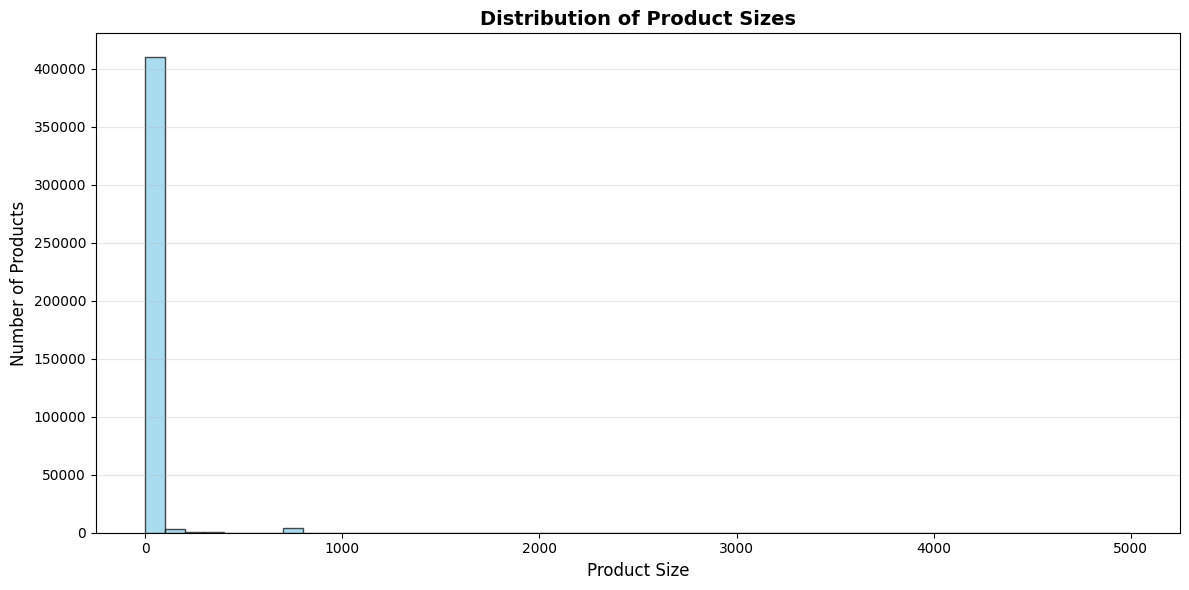


Size Distribution Statistics:
Total products: 418534
Min size: 0.03
Max size: 5000.00
Mean size: 26.65
Median size: 12.91

Products by Size Range:
0-20: 309,394 products
20-50: 65,953 products
50-100: 34,615 products
100-200: 3,383 products
200-500: 868 products
500+: 4,321 products


In [14]:
import matplotlib.pyplot as plt

# Create histogram of product sizes
plt.figure(figsize=(12, 6))
plt.hist(new_df['size'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Distribution of Product Sizes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show statistics about size ranges
print("\nSize Distribution Statistics:")
print(f"Total products: {len(new_df)}")
print(f"Min size: {new_df['size'].min():.2f}")
print(f"Max size: {new_df['size'].max():.2f}")
print(f"Mean size: {new_df['size'].mean():.2f}")
print(f"Median size: {new_df['size'].median():.2f}")

# Count products in different size ranges
ranges = [(0, 20), (20, 50), (50, 100), (100, 200), (200, 500), (500, float('inf'))]
print("\nProducts by Size Range:")
for start, end in ranges:
    if end == float('inf'):
        count = len(new_df[new_df['size'] >= start])
        print(f"{start}+: {count:,} products")
    else:
        count = len(new_df[(new_df['size'] >= start) & (new_df['size'] < end)])
        print(f"{start}-{end}: {count:,} products")

In [15]:
# Cap extreme size values
new_df['size'] = np.clip(new_df['size'], None, 200)

# Define category-based shelf assignment (0.55 weightage)
def assign_shelf_by_category(category):
    # TOP SHELF (0) - Premium, deliberate purchases
    top_shelf = ['Health and Wellness', 'Electronics', 'Home and Kitchen', 
                 'Clothing and Accessories', 'Frozen Foods']
    
    # MIDDLE SHELF (1) - High demand, impulse buying
    middle_shelf = ['Snacks', 'Beverages', 'Dairy', 'Breakfast', 
                    'Fruits and Vegetables', 'Bakery', 'Personal Care']
    
    # BOTTOM SHELF (2) - Heavy, bulk, low margin
    bottom_shelf = ['Grocery', 'Household', 'Baby']
    
    if category in top_shelf:
        return 0
    elif category in middle_shelf:
        return 1
    elif category in bottom_shelf:
        return 2
    else:  # 'others'
        return 1  # default to middle
    
# Define size-based shelf assignment (0.45 weightage)
def assign_shelf_by_size(size):
    if size <= 15:
        return 0  # TOP
    elif size <= 60:
        return 1  # MIDDLE
    else:
        return 2  # BOTTOM

# Apply both functions
new_df['shelf_by_category'] = new_df['type'].apply(assign_shelf_by_category)
new_df['shelf_by_size'] = new_df['size'].apply(assign_shelf_by_size)

# Calculate weighted shelf score (0.55 category + 0.45 size)
new_df['shelf_score'] = (0.55 * new_df['shelf_by_category']) + (0.45 * new_df['shelf_by_size'])

# Assign final place based on weighted score
# Round to nearest integer for final shelf assignment
new_df['place'] = new_df['shelf_score'].round().astype(int)

# Drop temporary columns
new_df = new_df.drop(['shelf_by_category', 'shelf_by_size', 'shelf_score'], axis=1)

# Display results
print("Sample of DataFrame with updated 'place' column:")
print(new_df.sample(10))

# Show distribution of shelf assignments
print("\nDistribution of shelf assignments:")
print("0 = TOP SHELF (Premium)")
print("1 = MIDDLE SHELF (Eye Level - Max Sales)")
print("2 = BOTTOM SHELF (Heavy/Bulk)")
print(new_df['place'].value_counts().sort_index())

# Show statistics by category
print("\nShelf assignment by category:")
for category in new_df['type'].unique():
    if category != 'others':
        shelf_dist = new_df[new_df['type'] == category]['place'].value_counts().sort_index()
        print(f"\n{category}:")
        for shelf, count in shelf_dist.items():
            print(f"  Shelf {shelf}: {count:,} products")


Sample of DataFrame with updated 'place' column:
                                                     name          type  \
178450  Carnation Breakfast Essentials Nutritional Pow...        others   
132444  Dole 100% Pineapple Juice, All Natural Canned ...     Beverages   
304787        Lawry's 25% Less Sodium Seasoned Salt, 8 oz       Grocery   
415853  Cook's California Champagne Brut White Sparkli...     Beverages   
235369            Hostess Suzy Q Cakes , 2-Pack (4 Count)        Bakery   
61646              Senor Rico Carmel Flan, 4 oz., 4 Count        others   
376150     Great Value No Salt Added Sweet Corn, 15.25 oz       Grocery   
412775  Meiomi Pinot Noir Red Wine, 750 mL Bottle, 13....     Beverages   
104999  Life Savers Pep-O-Mint Breath Mints Hard Candy...        others   
278581  Life Cuisine Chicken Enchilada Bowl Frozen Mea...  Frozen Foods   

              size  place  
178450   18.827356      1  
132444    6.000000      1  
304787    8.000000      1  
415853    1.5

In [16]:
new_df.sample(10)

,name,type,size,place
28248,"Mac's Original Crispy Fried Pork Skins, 11 oz ...",Snacks,11.000000,1
227844,"BODYARMOR LYTE Sports Drink, Blueberry Pomegra...",Beverages,16.000000,1
91946,"Bella Rosa Grated Parmesan Cheese, 5 Oz",Grocery,5.000000,1
350726,Badia Sazn Tropical with Coriander & Annatto 6...,Grocery,6.750000,1
244758,Sam's Choice Premium Frozen Cooked Medium Shri...,others,10.000000,1
278007,"Great Value Pancake & Sausage on a Stick, 25 o...",Frozen Foods,25.000000,0
102740,"Torani Puremade White Chocolate Sauce, Authent...",Grocery,16.500000,2
149825,"KIND THINS Peanut Butter Dark Chocolate Bars, ...",Snacks,0.740000,1
94394,Queso Melt Jalapeno,Grocery,15.244382,2
117430,"Orville Redenbacher's Ultimate Butter Popcorn,...",Snacks,3.000000,1


In [17]:
# Random Forest model to predict shelf placement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [18]:
# Prepare data for modeling
# Encode the 'type' column
le = LabelEncoder()
new_df['type_encoded'] = le.fit_transform(new_df['type'])

# Features (X) and Target (y)
X = new_df[['type_encoded', 'size']]
y = new_df['place']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"\nTarget distribution in training set:")
print(y_train.value_counts().sort_index())

Training set size: 334827
Testing set size: 83707

Target distribution in training set:
place
0     15054
1    287546
2     32227
Name: count, dtype: int64


In [19]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
print("Model training completed!")

# Make predictions on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['TOP Shelf', 'MIDDLE Shelf', 'BOTTOM Shelf']))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Random Forest model...
Model training completed!

Model Accuracy: 1.0000 (100.00%)

Classification Report:
              precision    recall  f1-score   support

   TOP Shelf       1.00      1.00      1.00      3764
MIDDLE Shelf       1.00      1.00      1.00     71886
BOTTOM Shelf       1.00      1.00      1.00      8057

    accuracy                           1.00     83707
   macro avg       1.00      1.00      1.00     83707
weighted avg       1.00      1.00      1.00     83707


Confusion Matrix:
[[ 3764     0     0]
 [    0 71886     0]
 [    0     0  8057]]


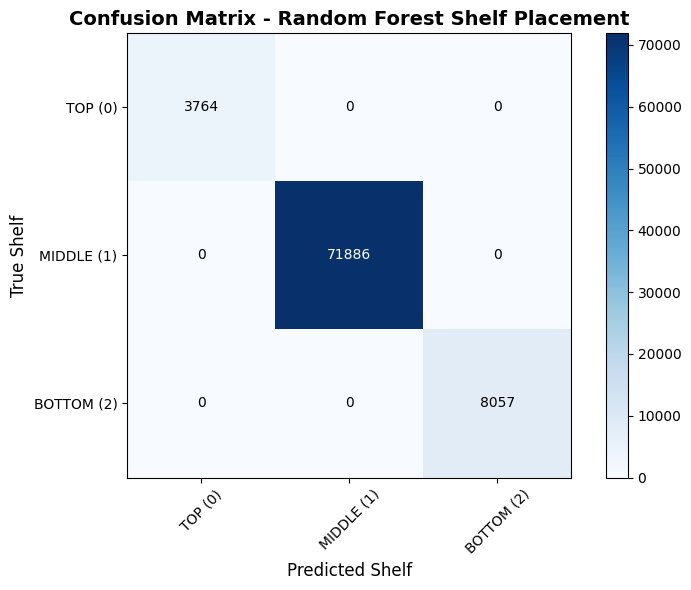

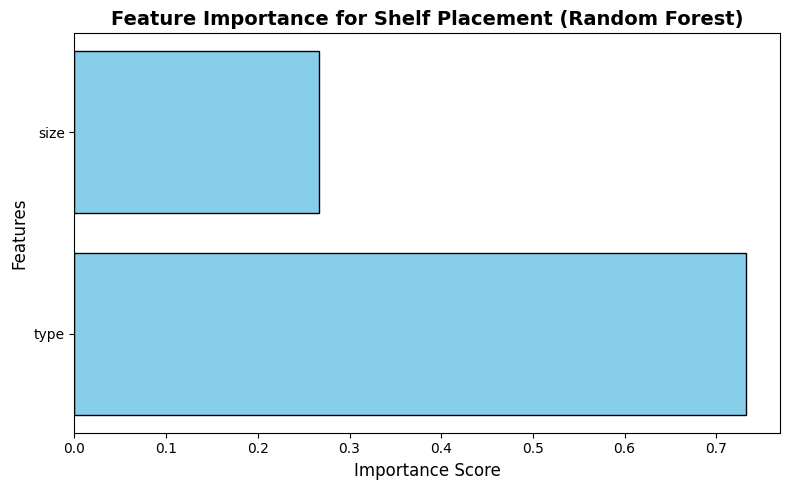


Feature Importance:
type: 0.7328
size: 0.2672


In [20]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix - Random Forest Shelf Placement', fontsize=14, fontweight='bold')
plt.colorbar()

# Add labels
classes = ['TOP (0)', 'MIDDLE (1)', 'BOTTOM (2)']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Shelf', fontsize=12)
plt.xlabel('Predicted Shelf', fontsize=12)
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = rf_model.feature_importances_
feature_names = ['type', 'size']

plt.figure(figsize=(8, 5))
plt.barh(feature_names, feature_importance, color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Shelf Placement (Random Forest)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nFeature Importance:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")


In [21]:
# Let's understand the impact of 55-45 weighting
print("="*60)
print("IMPACT OF 55-45 WEIGHTING (Category vs Size)")
print("="*60)

# Check the relationship between type and place
print("\n1. Shelf assignment by category (NOW 55% weight):")
category_to_shelf = new_df.groupby('type')['place'].agg(['mean', 'std', lambda x: x.mode()[0]]).round(2)
category_to_shelf.columns = ['Mean Shelf', 'Std Dev', 'Most Common Shelf']
print(category_to_shelf)

print("\n2. Key Insight with 55-45 weighting:")
print("   - Category has slightly more weight (55%) than size (45%)")
print("   - This allows size to influence the final shelf assignment significantly")
print("   - The model should now show non-zero importance for size feature")

# Show example: within same category, different sizes affecting shelf
print("\n3. Example - Beverages category with different sizes and shelves:")
beverages_sample = new_df[new_df['type'] == 'Beverages'][['name', 'type', 'size', 'place']].sort_values('size').head(10)
print(beverages_sample)

print("\n4. The Updated Math:")
print("   - If type='Beverages' → category_shelf = 1 (MIDDLE)")
print("   - Size impact: 0.45 * size_shelf (slightly less than category)")
print("   - Final = 0.55*category_shelf + 0.45*size_shelf")
print("   - This creates more variation in shelf assignments based on size!")

print("\n5. Distribution of size by shelf:")
for shelf in sorted(new_df['place'].unique()):
    shelf_sizes = new_df[new_df['place'] == shelf]['size']
    print(f"   Shelf {shelf}: Mean size = {shelf_sizes.mean():.2f}, Median = {shelf_sizes.median():.2f}")


IMPACT OF 55-45 WEIGHTING (Category vs Size)

1. Shelf assignment by category (NOW 55% weight):
                          Mean Shelf  Std Dev  Most Common Shelf
type                                                            
Bakery                          1.00     0.00                  1
Beverages                       1.00     0.00                  1
Breakfast                       1.00     0.00                  1
Clothing and Accessories        0.08     0.28                  0
Dairy                           1.00     0.00                  1
Frozen Foods                    0.03     0.18                  0
Fruits and Vegetables           1.00     0.00                  1
Grocery                         1.40     0.49                  1
Home and Kitchen                0.03     0.16                  0
Snacks                          1.00     0.00                  1
others                          1.00     0.00                  1

2. Key Insight with 55-45 weighting:
   - Category has sli

In [22]:
# UNSUPERVISED LEARNING APPROACH - KMeans Clustering
print("="*70)
print("UNSUPERVISED LEARNING: K-MEANS CLUSTERING")
print("="*70)

# Filter data: exclude rows with size > 800
df_unsupervised = new_df[new_df['size'] <= 800].copy()
print(f"\nFiltered dataset (size <= 800): {len(df_unsupervised):,} rows")
print(f"Excluded rows (size > 800): {len(new_df) - len(df_unsupervised):,} rows")

# Prepare features for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use type_encoded and size as features
X_cluster = df_unsupervised[['type_encoded', 'size']].copy()

# Scale the features (important for KMeans)
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

print(f"\nFeatures for clustering:")
print(f"  • type_encoded: {X_cluster['type_encoded'].min():.0f} to {X_cluster['type_encoded'].max():.0f}")
print(f"  • size: {X_cluster['size'].min():.2f} to {X_cluster['size'].max():.2f}")

# Apply KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to the filtered dataframe
df_unsupervised['un_ml_op'] = clusters

# For the original dataframe, assign NaN to excluded rows
new_df['un_ml_op'] = np.nan
new_df.loc[df_unsupervised.index, 'un_ml_op'] = df_unsupervised['un_ml_op']

print(f"\n✅ KMeans clustering completed!")
print(f"\nCluster distribution (un_ml_op):")
print(new_df['un_ml_op'].value_counts().sort_index())
print(f"\nRows with NaN (size > 800): {new_df['un_ml_op'].isna().sum():,}")

# Get cluster centers (in original scale)
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)

print(f"\n📊 Cluster Centroids (Original Scale):")
centroids_df = pd.DataFrame(centers_original, 
                            columns=['Avg_Type_Encoded', 'Avg_Size'],
                            index=['Cluster 0', 'Cluster 1', 'Cluster 2'])
print(centroids_df.round(2))

# Analyze each cluster
print(f"\n{'='*70}")
print("CLUSTER ANALYSIS")
print(f"{'='*70}")

for cluster_id in [0.0, 1.0, 2.0]:
    cluster_data = new_df[new_df['un_ml_op'] == cluster_id]
    print(f"\n🔹 Cluster {int(cluster_id)}:")
    print(f"   Products: {len(cluster_data):,}")
    print(f"   Avg Size: {cluster_data['size'].mean():.2f}")
    print(f"   Size Range: {cluster_data['size'].min():.2f} - {cluster_data['size'].max():.2f}")
    print(f"   Top 3 Product Types:")
    top_types = cluster_data['type'].value_counts().head(3)
    for type_name, count in top_types.items():
        print(f"     • {type_name}: {count:,} products")

print(f"\n{'='*70}")
print("✅ Unsupervised clustering column 'un_ml_op' created!")
print(f"{'='*70}")

UNSUPERVISED LEARNING: K-MEANS CLUSTERING

Filtered dataset (size <= 800): 418,534 rows
Excluded rows (size > 800): 0 rows

Features for clustering:
  • type_encoded: 0 to 10
  • size: 0.03 to 200.00

✅ KMeans clustering completed!

Cluster distribution (un_ml_op):
un_ml_op
0.0    236572
1.0    173475
2.0      8487
Name: count, dtype: int64

Rows with NaN (size > 800): 0

📊 Cluster Centroids (Original Scale):
           Avg_Type_Encoded  Avg_Size
Cluster 0              8.23     13.03
Cluster 1              1.96     23.78
Cluster 2              2.37    171.10

CLUSTER ANALYSIS

🔹 Cluster 0:
   Products: 236,572
   Avg Size: 13.03
   Size Range: 0.03 - 102.00
   Top 3 Product Types:
     • Grocery: 99,622 products
     • Snacks: 70,107 products
     • others: 56,238 products

🔹 Cluster 1:
   Products: 173,475
   Avg Size: 23.78
   Size Range: 0.07 - 96.00
   Top 3 Product Types:
     • Beverages: 90,836 products
     • Dairy: 44,193 products
     • Bakery: 14,452 products

🔹 Cluster 2:
 

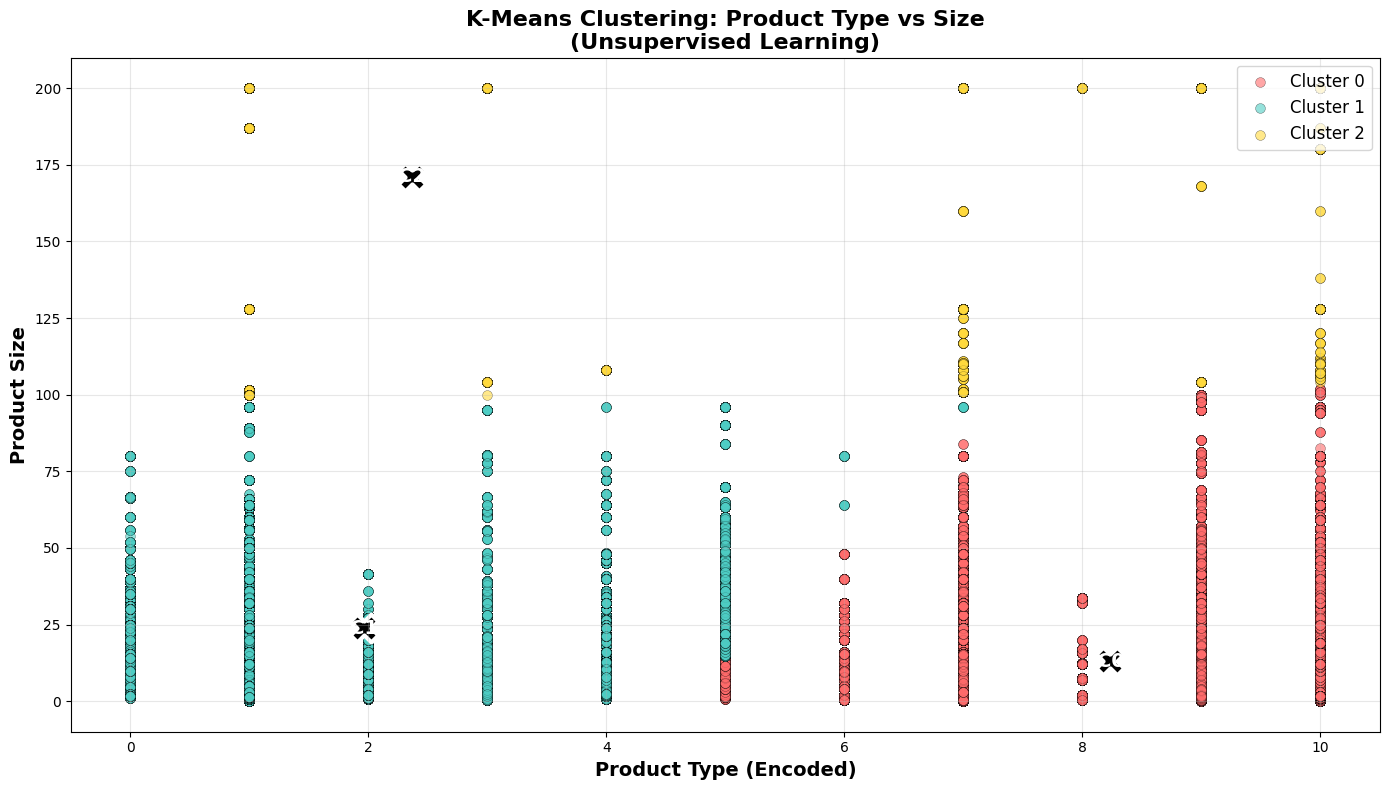

📊 Visualization shows how K-Means naturally groups products based on type and size


In [23]:
# Visualize the KMeans clusters
import matplotlib.pyplot as plt

# Filter for visualization (only rows with valid un_ml_op)
df_viz = new_df[new_df['un_ml_op'].notna()].copy()

plt.figure(figsize=(14, 8))

# Define colors for clusters
cluster_colors = {0: '#FF6B6B', 1: '#4ECDC4', 2: '#FFD93D'}
cluster_names = {0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2'}

# Plot each cluster
for cluster_id in [0.0, 1.0, 2.0]:
    cluster_data = df_viz[df_viz['un_ml_op'] == cluster_id]
    plt.scatter(cluster_data['type_encoded'], 
               cluster_data['size'],
               c=cluster_colors[int(cluster_id)],
               label=cluster_names[int(cluster_id)],
               alpha=0.6,
               s=50,
               edgecolors='black',
               linewidth=0.3)

# Plot cluster centers
for i, center in enumerate(centers_original):
    plt.scatter(center[0], center[1], 
               c='black', 
               marker='X', 
               s=400, 
               edgecolors='white',
               linewidth=3)
    plt.annotate(f'C{i}', 
                xy=(center[0], center[1]), 
                fontsize=14, 
                fontweight='bold',
                color='white',
                ha='center',
                va='center')

plt.xlabel('Product Type (Encoded)', fontsize=14, fontweight='bold')
plt.ylabel('Product Size', fontsize=14, fontweight='bold')
plt.title('K-Means Clustering: Product Type vs Size\n(Unsupervised Learning)', 
         fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Visualization shows how K-Means naturally groups products based on type and size")

In [24]:
# Compare supervised (place) vs unsupervised (un_ml_op) approaches
print("="*70)
print("COMPARISON: Supervised (place) vs Unsupervised (un_ml_op)")
print("="*70)

# Filter for valid comparisons
df_compare = new_df[new_df['un_ml_op'].notna()].copy()

print(f"\n📊 Distribution Comparison:")
print(f"\nSupervised (place) - Based on 55-45 weighted formula:")
print(df_compare['place'].value_counts().sort_index())

print(f"\nUnsupervised (un_ml_op) - Based on K-Means clustering:")
print(df_compare['un_ml_op'].value_counts().sort_index())

# Cross-tabulation to see alignment
print(f"\n🔄 Cross-tabulation (How clusters align with shelves):")
crosstab = pd.crosstab(df_compare['place'], df_compare['un_ml_op'], 
                       rownames=['Supervised (place)'], 
                       colnames=['Unsupervised (un_ml_op)'])
print(crosstab)

# Calculate agreement percentage
agreement = (df_compare['place'] == df_compare['un_ml_op']).sum()
total = len(df_compare)
agreement_pct = (agreement / total) * 100

print(f"\n📈 Direct Agreement: {agreement:,} / {total:,} ({agreement_pct:.2f}%)")
print(f"\nNote: Low agreement is EXPECTED because:")
print("  • Supervised uses business rules (55% type, 45% size)")
print("  • Unsupervised discovers natural data patterns")
print("  • Both approaches are valid for different purposes!")

# Show sample comparisons
print(f"\n🔍 Sample Products - Supervised vs Unsupervised:")
sample = df_compare[['name', 'type', 'size', 'place', 'un_ml_op']].sample(10)
print(sample.to_string(index=False))

COMPARISON: Supervised (place) vs Unsupervised (un_ml_op)

📊 Distribution Comparison:

Supervised (place) - Based on 55-45 weighted formula:
place
0     18818
1    359432
2     40284
Name: count, dtype: int64

Unsupervised (un_ml_op) - Based on K-Means clustering:
un_ml_op
0.0    236572
1.0    173475
2.0      8487
Name: count, dtype: int64

🔄 Cross-tabulation (How clusters align with shelves):
Unsupervised (un_ml_op)     0.0     1.0   2.0
Supervised (place)                           
0                          9138    9680     0
1                        187961  163788  7683
2                         39473       7   804

📈 Direct Agreement: 173,730 / 418,534 (41.51%)

Note: Low agreement is EXPECTED because:
  • Supervised uses business rules (55% type, 45% size)
  • Unsupervised discovers natural data patterns
  • Both approaches are valid for different purposes!

🔍 Sample Products - Supervised vs Unsupervised:
                                                                           

In [25]:
new_df.info()
new_df.sample(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418534 entries, 0 to 418533
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          418534 non-null  object 
 1   type          418534 non-null  object 
 2   size          418534 non-null  float64
 3   place         418534 non-null  int32  
 4   type_encoded  418534 non-null  int32  
 5   un_ml_op      418534 non-null  float64
dtypes: float64(2), int32(2), object(2)
memory usage: 16.0+ MB


,name,type,size,place,type_encoded,un_ml_op
230556,"Lipton Family Sized Iced Black Tea , Peach, Te...",Beverages,64.154896,1,1,1.0
293995,"BENS ORIGINAL Flavored Grains, Long Grain & Wi...",Grocery,6.000000,1,7,0.0


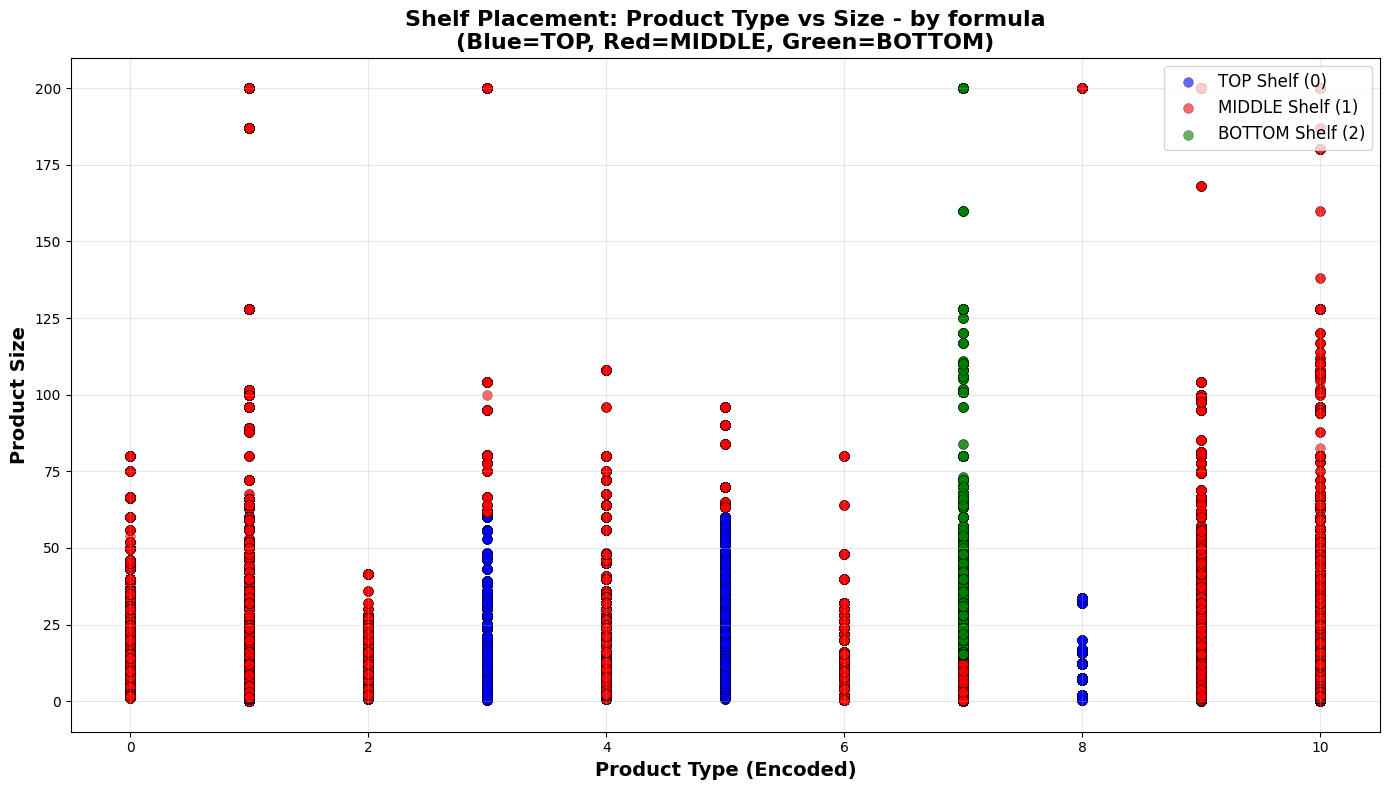

📊 Scatter plot shows distribution of products across shelves based on type and size


In [26]:
# Visualize shelf placement (place) with color coding
plt.figure(figsize=(14, 8))

# Define colors for each shelf
place_colors = {0: 'blue', 1: 'red', 2: 'green'}
place_names = {0: 'TOP Shelf (0)', 1: 'MIDDLE Shelf (1)', 2: 'BOTTOM Shelf (2)'}

# Plot each shelf placement
for place_id in [0, 1, 2]:
    place_data = new_df[new_df['place'] == place_id]
    plt.scatter(place_data['type_encoded'], 
               place_data['size'],
               c=place_colors[place_id],
               label=place_names[place_id],
               alpha=0.6,
               s=50,
               edgecolors='black',
               linewidth=0.3)

plt.xlabel('Product Type (Encoded)', fontsize=14, fontweight='bold')
plt.ylabel('Product Size', fontsize=14, fontweight='bold')
plt.title('Shelf Placement: Product Type vs Size - by formula\n(Blue=TOP, Red=MIDDLE, Green=BOTTOM)', 
         fontsize=16, fontweight='bold')
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Scatter plot shows distribution of products across shelves based on type and size")